## Observations and Insights 

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Import data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# # Check number of mice
total_mice = mouse_study["Mouse ID"].nunique()
total_mice

249

In [3]:
# Get duplicate mice by ID number for Mouse ID and Timepoint
duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_df = mouse_study.drop(mouse_study[mouse_study["Mouse ID"] == "g989"].index)

In [5]:
# Check the number of mice in the clean DataFrame
total_cleaned_mice = cleaned_df["Mouse ID"].nunique()
total_cleaned_mice

248

## Summary Statistics

In [6]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by regimen
regimen_group = cleaned_df.groupby("Drug Regimen")

# Calculate mean
regimen_tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()

# Calculate median
regimen_tumor_median = regimen_group["Tumor Volume (mm3)"].median()

# # Calculate variance
regimen_tumor_var = regimen_group["Tumor Volume (mm3)"].var()

# # Calculate std dev
regimen_tumor_stddev = regimen_group["Tumor Volume (mm3)"].std()

# # Calculate SEM
regimen_tumor_sem = regimen_group["Tumor Volume (mm3)"].sem()

# Create dataframe
regimen_group_df = pd.DataFrame({"Tumor Vol Mean":regimen_tumor_mean, "Tumor Vol Median":regimen_tumor_median,
                                 "Tumor Vol Variance":regimen_tumor_var, "Tumor Vol Std Deviation":regimen_tumor_stddev,
                                 "Tumor Vol SEM":regimen_tumor_sem})

# Display
regimen_group_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Using the aggregation method, produce the same summary statistics in a single line
regimen_group_df2 = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
regimen_group_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

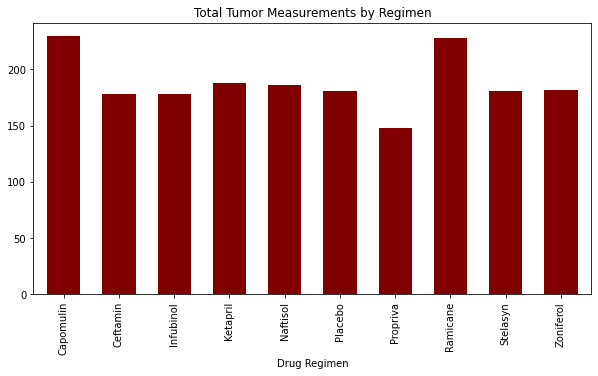

In [8]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
total_measurements = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()

total_measurements.plot(kind="bar", width=0.6, figsize=(10,5), color=["maroon"], title="Total Tumor Measurements by Regimen")

plt.show()

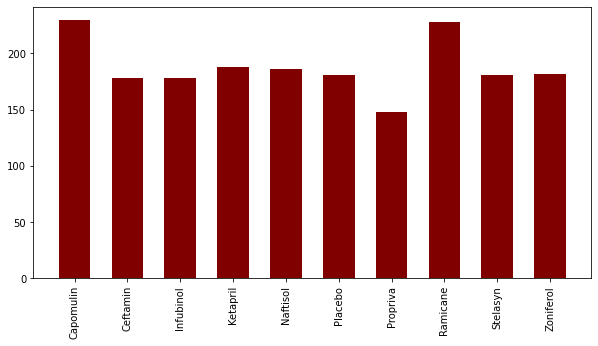

In [9]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
# Set x axis and tick locations
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_groups = cleaned_df.groupby("Drug Regimen")
tumor_measurements = drug_groups["Tumor Volume (mm3)"].count()

# Create bar chart and set formatting/parameters
plt.figure(figsize=(10,5))
plt.bar(drugs, tumor_measurements, width=0.6, color="maroon", align="center")
plt.xticks(rotation="vertical")

plt.show()

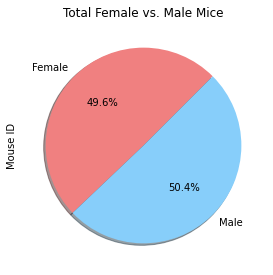

In [10]:
## Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = cleaned_df.groupby("Sex")
gender_dist_df = gender_dist["Mouse ID"].nunique()

gender_dist_df.plot(y=None, kind="pie", figsize=(4.5,4.5), colors=["lightcoral", "lightskyblue"], autopct="%1.1f%%",
                    legend=False, title="Total Female vs. Male Mice", shadow=True, startangle=45)

plt.show()

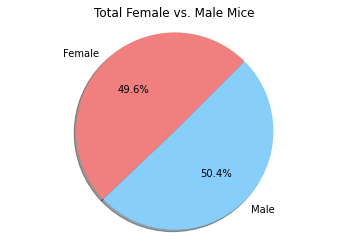

In [28]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = ["Female", "Male"]
sizes = gender_dist_df
gender_colors = ["lightcoral", "lightskyblue"]

plt.pie(sizes, labels=gender_labels, colors=gender_colors, autopct="%1.1f%%", shadow=True, startangle=45)

plt.title("Total Female vs. Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

## Start by getting the last (greatest) timepoint for each mouse
mice_grouped_data = cleaned_df.groupby("Mouse ID")
timepoint = mice_grouped_data["Timepoint"].max()

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(cleaned_df, timepoint, on=["Mouse ID", "Timepoint"], how="inner")
#final_tumor_df.set_index("Drug Regimen", inplace=True)
final_tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [79]:
## Put treatments into a list for for loop (and later for plot labels)
limited_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

## Calculate the IQR and quantitatively determine if there are any potential outliers
# tumor_quartiles = final_tumor_df.quantile([.25,.5,.75])
# lowerq = tumor_quartiles[0.25]
# upperq = tumor_quartiles[0.75]
# tumor_iqr = upperq-lowerq

## Locate the rows which contain mice on each drug and get the tumor volumes
# for regimen in limited_regimens:
#     final_tumor_df.loc[:, ["Drug Regimen" == regimen]]
#     tumor_vol_data.append(final_tumor_df["Tumor Volume (mm3)"])

# tumor_vol_data

capomulin = final_tumor_df.loc[(final_tumor_df["Drug Regimen"].str.contains("Capomulin"))]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


In [ ]:

    ## add subset 
    
    
    ## Determine outliers using upper and lower bounds
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
                              
tumor_vol_data

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

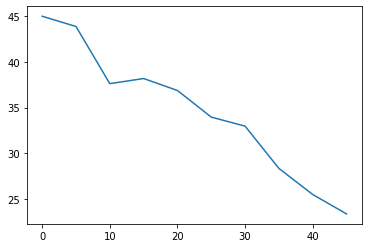

In [81]:
## Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Drop all regimens but Capomulin
capomulin_df = cleaned_df.drop(cleaned_df[cleaned_df["Drug Regimen"] != "Capomulin"].index)

# Set line data to read for one mouse
s185_df = capomulin_df.drop(capomulin_df[capomulin_df["Mouse ID"] != "s185"].index)

timepoint_capo = s185_df["Timepoint"]
tumor_vol_capo = s185_df["Tumor Volume (mm3)"]

# Generate line plot
plt.plot(timepoint_capo, tumor_vol_capo)

<function matplotlib.pyplot.show(*args, **kw)>

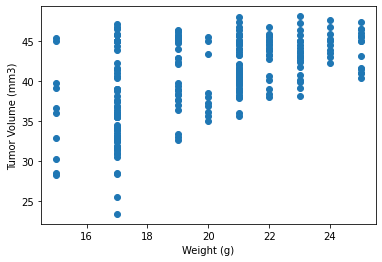

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values_capo = capomulin_df["Weight (g)"]
y_values_capo = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(x_values_capo,y_values_capo)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(*args, **kw)>

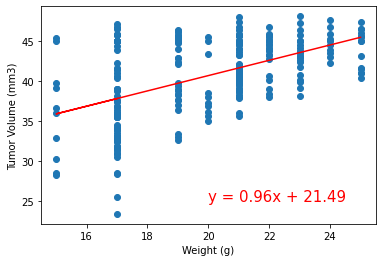

In [42]:
## Calculate the correlation coefficient and linear regression model 
## for mouse weight and average tumor volume for the Capomulin regimen
x_values_capo = capomulin_df["Weight (g)"]
y_values_capo = capomulin_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_capo, y_values_capo)
regress_values = x_values_capo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_capo,y_values_capo)
plt.plot(x_values_capo,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show